# Homework 5 - Exploring StackOverflow!

> ### Authors:
> - Christian Buda 1769008
> - Martina 
> - Matteo Broglio 1200739

## Imports

In [1]:
import functionality_1 as f1
import functionality_2 as f2
import functionality_3 as f3
import functionality_4 as f4
from utilities import *

Get the datasets:

In [2]:
datasets = get_dataset_graphs(1300050000, 1300060000)

retrieve the first dataset from the disk


  0%|          | 0/17823525 [00:00<?, ?it/s]

retrieve the second dataset from the disk


  0%|          | 0/25405374 [00:00<?, ?it/s]

retrieve the third dataset from the disk


  0%|          | 0/20268151 [00:00<?, ?it/s]

# Functionality 1

Graph Type,Weighted Directed Graph
Number of users,700
Number of answers/comments,525
Average number of answers/comments per user,0.75
Average number of links per user,0.75
Density degree of the graph,1.07e-03
Density/Sparsity,The graph is Sparse


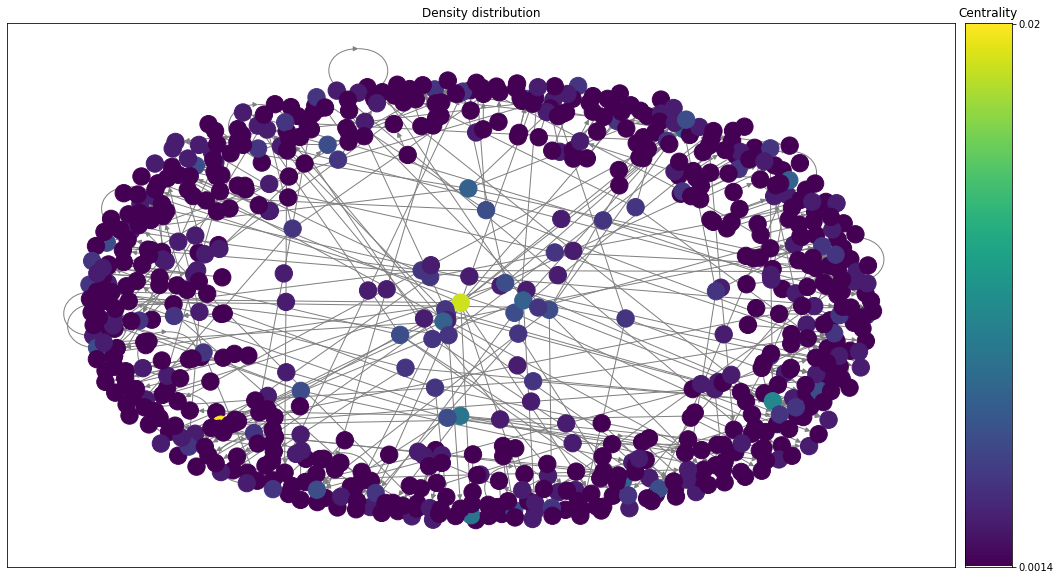

In [5]:
input_multidigraph = datasets[0]

graph, graph_type, n_users, n_answers_comments, average_answers_comments, average_links, density, is_dense = f1.functionality_1(input_multidigraph)

# Plot the output
f1.plot_1(graph, graph_type, n_users, n_answers_comments, average_answers_comments, average_links, density, is_dense)

## Functionality 2

### BETWEENESS
In graph theory betweeness centrality is a measure of centrality based on shortest paths. Betweeness of a node $n_v$ is calculated as the summatory of the number of shortest path in which there is the node, on the total number of the total shortest path of the graph. A shortest path is the path to go from a node $n_i$ to a node $n_j$ such that the number of edges that the path passes through is minimized. Instead, if the graph is weighted, we want that the sum of the weights of the edges is minimized. The meaning of this centrality measure is how much a node stands between each other node: it evaluates the importance of a node based on its own ability to perform as a "bridge" among the nodes. The higher the measure is, the more important the node is in the graph, because it means that node is usefull to transport a very high number of information through the graph, moreover it has control over these information.

The formula we used is the normalized one:

\begin{equation}
b(v)=\sum_{i, j \in V} \frac{g_{ij}^v}{g_{ij}} \frac{2}{|V|^2 - 3|V| + 2} 
\end{equation}

in which $g_ij$ is the shortest path from the node $i$ to the node $j$, and $g^v_ij$ is the shortest path from $i$ to $j$ in which appear the node $i$, and $|V|$ is the total number of nodes in the graph.

BETWEENESS: 0.0022176353970500095


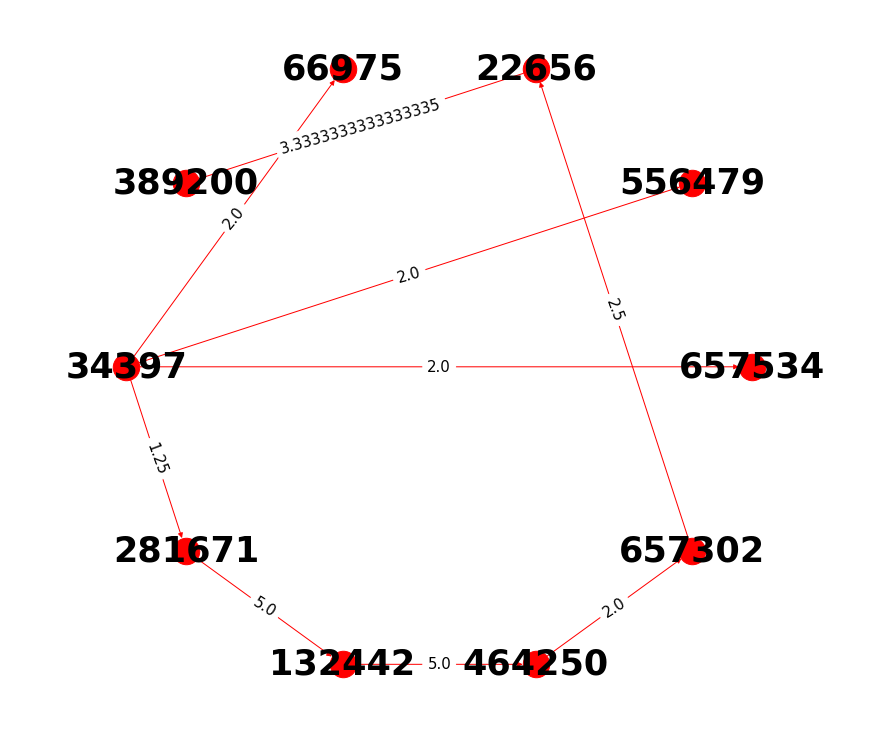

In [25]:
user = 42
start_time = 1300050000
end_time = 1300053000
metric = 'BETWEENESS'
node = 34397 

# Get the metric
value, g = f2.functionality_2(node, start_time, end_time, metric, datasets)
print('BETWEENESS:', value)

# Plot the metric
f2.plot_metric(g, node, metric)

### PAGE RANK

PageRank is an alghorithm to measure the importance of a node in a graph. It works by counting the number and quality of links to the node to determine a rough estimate of how important it is.
The algorithm was initially invented and used by Google, to help its search engines to reach more important pages for a specific query. Given a node $n_i$ this metric is defined recursively, and it is based on the value of the page rank metric of all pages that have an edge to the node itself (all the 'incoming' edge to it). A page that is linked to by many pages with high PageRank receives a high rank itself.

PAGERANK: 0.0007930214115781125


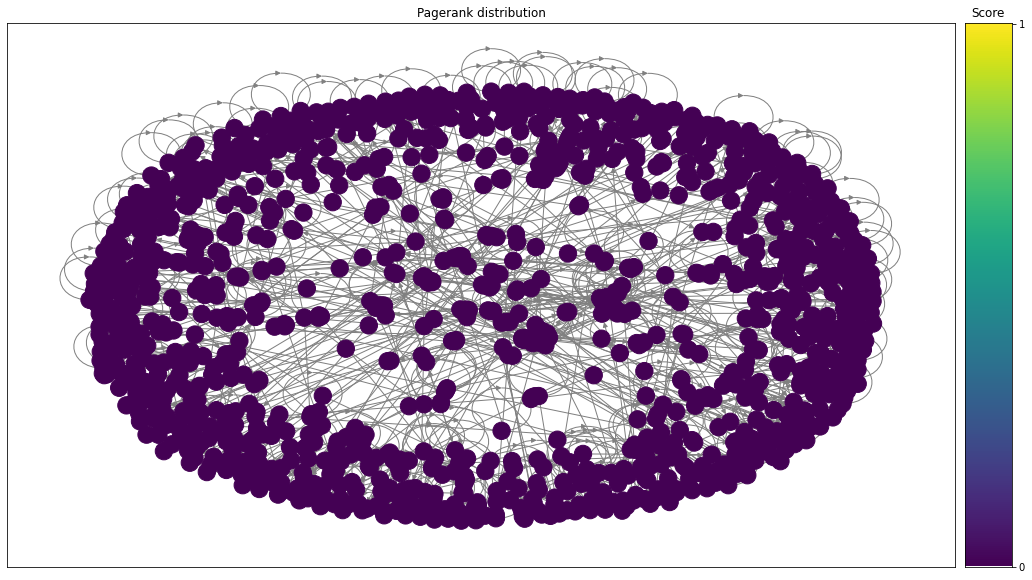

In [5]:
user = 42
start_time = 1300050000
end_time = 1300060000
metric = 'PAGERANK'
node = 34397 

# Get the metric
value, g = f2.functionality_2(node, start_time, end_time, metric, datasets)
print('PAGERANK:', value)

# Plot the metric
f2.plot_metric(g, node, metric)

In this graph the nodes seem to be all equally important (and they all have a very low pagerank score).

### DEGREE CENTRALITY

The degree centrality measure refers to the quantity of edge a node has, if the graph is directed we consider both incoming and outgoing edge.
According to this measure of centrality, higher values mean that the node is more connected: the greater is the degree of a node, and so the more connections it has, the greater its importance is. The meaning of this metric is that a node with a high degree will be more likely to communicate and communicate with other nodes. At the same time it doesn not give us information about the "centrality" of the node in the graph but only it refears to the "sociality" of the node.
We calculate the degree centrality normalized as follow:

\begin{equation}
d(i)=\frac{d_i}{|V|-1}
\end{equation}

with $d_i$ the degree of the node $i$, that is the quantity of edge incoming and outgoing of the node $i$, and $|V|$ is the total number of nodes in the graph.


DEGREE CENTRALITY: 0.018253968253968255


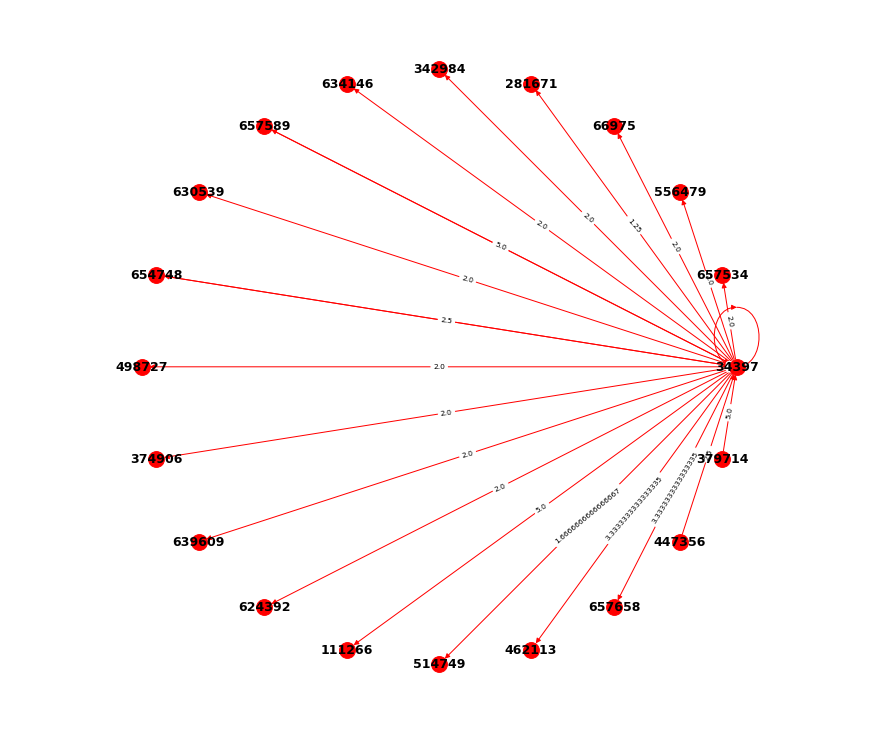

In [26]:
user = 42
start_time = 1300050000
end_time = 1300060000
metric = 'DEGREE CENTRALITY'
node = 34397 


# Get the metric
value, g = f2.functionality_2(node, start_time, end_time, metric, datasets)
print('DEGREE CENTRALITY:', value)

# Plot the metric
f2.plot_metric(g, node, metric)

Even though this is one of the most 'important' node in the graph (we can see from the plot that it has an high number of neighbours), the number of nodes is so big that the score is very low.

### CLOSENESS CENTRALITY
Closeness centrality of a node $i$ is calculated as the sum of the length of the shortest paths between the node and all other nodes in the graph. This means that the more central a node is, the closer it is to all other nodes. This quantity takes low values for vertices that are separated from others by only a short path on average. Such vertices might have better access to information at other vertices or more direct influence on other vertices. The max value that can assume is when the graph is a list and the two nodes are at the begining and at the end of this list, intead the lower value it can take is when we consider the central node in a star graph, and so it is at the center of each pair of node, reaching all the other nodes in just one edge.


\begin{equation}
c(i)=\frac{|V|-1}{\sum_{j \in V} d(i,j)}
\end{equation}


in which $d(i, j)$ is the shortest path from the node $i$ to all the nodes $j$ in $V$, and $|V|$ is the total number of nodes in the graph.

CLOSENESS CENTRALITY: 2.1547669944420695


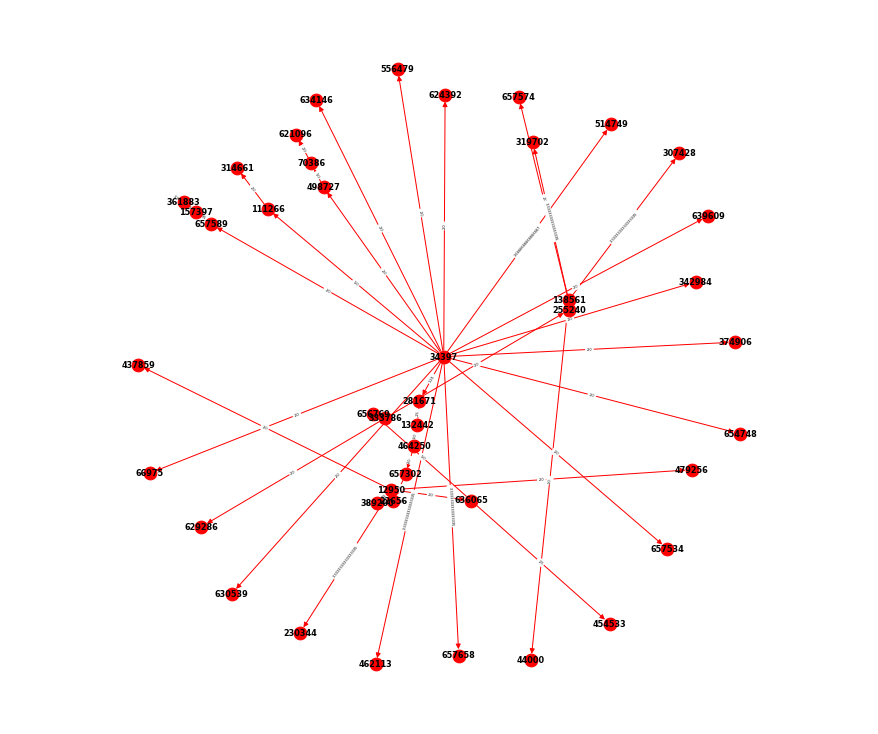

In [30]:
user = 42
start_time = 1300050000 
end_time = 1300060000 
metric = 'CLOSENESS CENTRALITY'

# Get the metric
value, g = f2.functionality_2(node, start_time, end_time, metric, datasets)
print('CLOSENESS CENTRALITY:', value)

# Plot the metric
f2.plot_metric(g, node, metric)

The high value indicates that the node is very central and strongly connected with the adjacent nodes.

## Functionality 3

The functionality 3 returns the shortest walk that goes from user p_j to p_n, and that visits in order the nodes in p. It requires a list of nodes and a source node and destination node.
This is solved by computing the shortest path for each adjacent pairs in the list with Dijkstra algorithm:

```
list = [4, 7, 1, 6] ---> path = dijstra(4, 7) + dijkstra(7, 1) + dijstra(1, 6)
```

34397 ---> [464250, 657302] ---> 636065

Path 34397 ---> 464250: [(34397, 281671, 1.25), (281671, 132442, 2.5), (132442, 464250, 5.0)] 
Weight: 8.75

Path 464250 ---> 657302: [(464250, 657302, 2.0)] 
Weight: 2.0

Path 657302 ---> 636065: [(657302, 22656, 2.5), (22656, 389200, 3.3333333333333335), (389200, 12950, 2.5), (12950, 636065, 2.0)] 
Weight: 10.333333333333334

Full path: [(34397, 281671, 1.25), (281671, 132442, 2.5), (132442, 464250, 5.0), (464250, 657302, 2.0), (657302, 22656, 2.5), (22656, 389200, 3.3333333333333335), (389200, 12950, 2.5), (12950, 636065, 2.0)] 

Full dist: 21.083333333333336


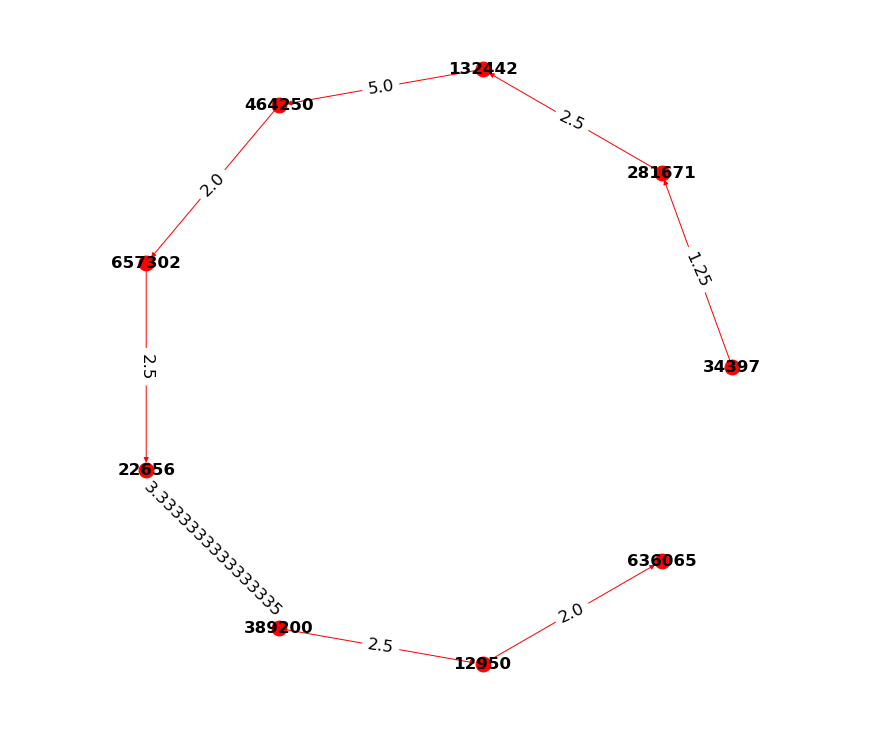

In [10]:
# Define the user
users_list = [34397, 464250, 657302, 636065]
# 428789: 7, 281671: 6, 556479
# Define the time range
start_time = 1300050000 #get_timestamp('2010-01-01')
end_time = 1300060000 #get_timestamp('2010-01-02')

# Get the path
path = f3.functionality_3(users_list=users_list, datasets=datasets, 
                       start_time=start_time, end_time=end_time)

# Plot the path
if isinstance(path, list):
    f3.plot_path(path, figsize=(12, 10))

# Functionality 4

To solve this problem, we will going to use graph flow theory. We based our implementation and the considerations on the book "Introduction to Algorithms" by Cormen, Leiserson, Rivest, and Stein; the details and the proofs about our statement can be found there.

Given a directed weighted graph, we want to disconnect two users from each other cutting the minimum number of edges (with their weight). We will start by considering simpler cases, and we will implement an heuristic for the most general case. Before proceeding we want to make a remark: in a directed graph the statement "user A is disconnected from user B" means that there is no directed path from A to B, this implies that the fact that user A is disconnected from user B is independent of the fact that user B is disconnected from user A; our goal is to disconnect both A from B and B from A at the same time, while keeping a minimum cut on all the edges. We consider:
1. The problem of disconnecting a "source" node from a "sink" node while keeping a minimum cut on the edges
2. The problem of disconnecting a node A from a node B in a directed graph while keeping a minimum cut on the edges
3. The problem of disconnecting both a node A from a node B and node B from a node A in a directed acyclical graph while keeping a minimum cut on the edges
4. The general problem of disconnecting both a node A from a node B and node B from a node A in a directed graph while keeping a minimum cut on the edges

### 1.
The first problem in the list is easy: the max-flow min-cut theorem states that the maximum amount of flow passing from the source to the sink is equal to the total weight of the edges in the minimum cut, so, leveraging the Ford-Fulkerson method for finding the maximum flow, we can then look for the "saturated" edges (in the condition of maximum flow) that are reached first from the source and remove them; and this corresponds to a minimum cut.

### 2.
This problem is analogous to the previous one: we just miss a "source" node and a "sink" node. To solve the problem we add a source node with an edge that points to A and a large weight (virtually infinite, but every large number will be fine: we just need to be sure that it does not saturates), and a sink node with an edge that point from B to the sink and a large weight (as before). This newly obtained graph can be analyzed using the previous method, and the solution will be equivalent to the starting graph.

### 3.
We now want to disconnect both A from B and B from A, the procedure seems straightforward: disconnect A from B and B from A by applying the previous method and then join the result to get the minimum cut, this, however, may not give the optimal solution; here we give a simple example.

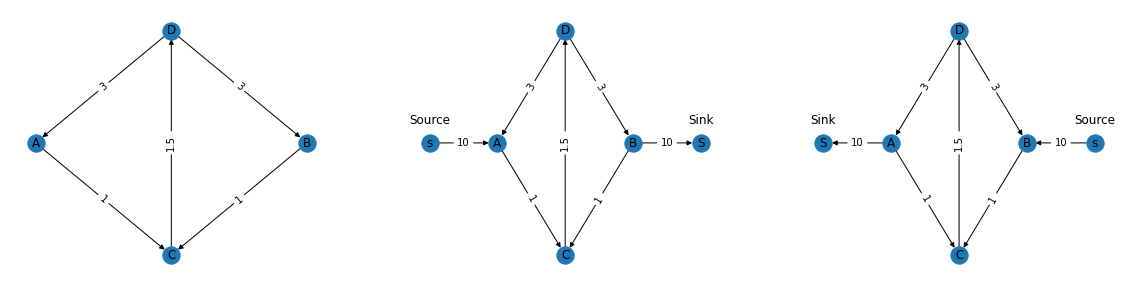

In [11]:
f4.plot_counterexample()

In this case, applying the Ford Fulkerson method to the first graph means applying it to the second and to the third, and then joining the result. In the second graph the optimal solution is removing the edge from A to C, while in the second is the edge from B to C. So removing this two edges from the original graph would disconnect A and B with a total cost of of 2, but the optimal solution would be removing just the edge from C to D (with a total cost of 1.5). The problem here is that exists two paths (one from A to B and the other from B to A) that have a common edge, which is equivalent to the existence of two distinct cycles (one that contains A and not B, and another that contains B and not A) that have a common edge. So this last case would be our exact hypotesis; in this framework, as said before, to find the optimal solution we can just apply the Ford Fulkerson method twice and join the solutions.

### 4.
We did not manage to find an algorithm to solve the general problem and that does not involve checking all the possible combinations of cuts. For this reason, we provide a couple of heuristics:
* upon starting the algorithm we search for all the possible couple of cycles containing A and B, we intersect each possible pairs and collect a set of edges, we remove the one with the lighter weight, and then we repeat until there are no common edges left. At this point we can proceed as described in the previous case.
* following the idea of the flow network, we imagine two distinct type of flow (with two sources and two sinks) that run in the same pipes, one from A to B and the other from B to A; we can try to maximize this flow by splitting the residual capacity of a common augmenting path between the two flows. This method however may depend  on the actual order in which we find the augmenting paths, and may not bring to the optimal solution. Moreover, it is easy to see that in this case the saturated paths are not necessarily those of a minimum cut.
* joining the last two methods, one may try to remove a saturated edge (as found with the previous method) if it is part of a common cycle (as above), and then repeating until no cycles remains.
* another possibility could be halving the capacity of the edges in the common cycles, and running the algorithm as if there were no common edges. At this point one could remove the common edges if they are saturated and then repeat the algorithm to find the cut. One may want to study more in detail the problem.
* our last proposal is just to ignore the problem of the cycles and proceed with the algorithm of the previous case.

These are all simple heuristic, and we can easily see some of them fail; we did not feel like neither spending more time on it, nor adding another layer of complexity to the algorithm, so we decided to go for this last choice. Since the graph will be pretty big, we hope that there won't be many common cycle edges that can give problems to our optimal solution. Moreover, specifically to not add complexity to the algorithm, we decided to implement the Edmonds-Karp version of the Ford Fulkerson method for finding the maximum flow, instead of a faster Push Relabel or Push to Front algorithms.

-------------------------------------------------------------------------------------
There are 1 edges to be removed, for a total cost of 1.25.
-------------------------------------------------------------------------------------


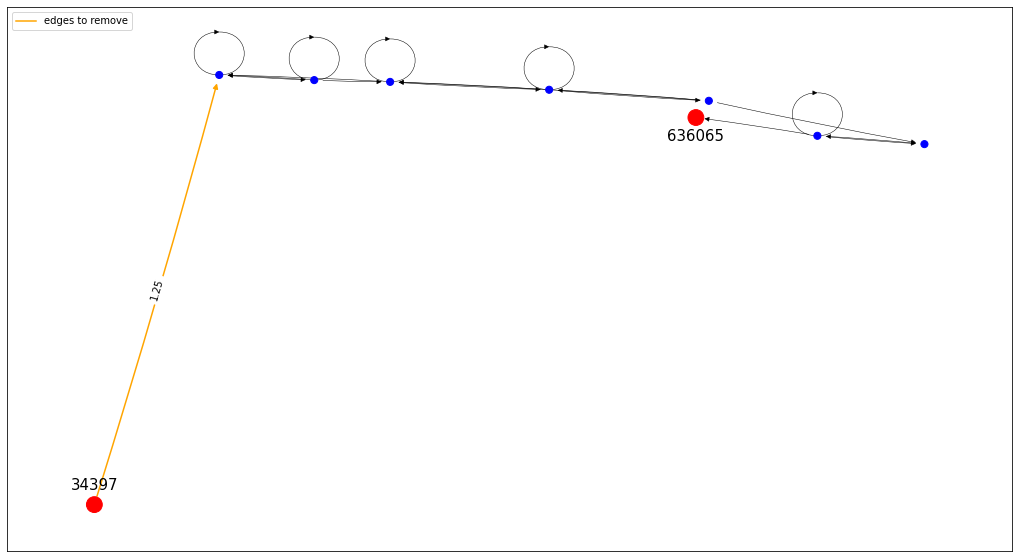

In [12]:
# Define the intervals
interval_1 = [
    1300050000, 
    1300055000, 
    ]

interval_2 = [
    1300055000, 
    1300060000, 
    ]

user_1 = 34397
user_2 = 636065

# Get the minimum disconnecting graphs 
graph, total_cost, edges = f4.functionality_4(datasets, interval_1, interval_2, user_1, user_2)

# Plot the cut
f4.plot_4(graph, edges, total_cost, user_1, user_2)

# 4. Algorithmic question 

A number ***n*** of kids are in a camp. Between some ***k*** pairs of them (a kid can be part of more than one pairs) there are often fights. At night there are two dormitories where the kids can sleep. We want, if possible, to assign each kid in one of the two dormitories in such a way that each pair of kids that fights often is assigned to a different dormitory. (There are no space problems and the two dormitories can have different number of kids.)

Give an algorithm that is linear in ***n*** and ***k*** that is able to answer whether such an assignment is possible and, if so, return one.

We formalize the given instruction using a graph in which every node is a kid, and every edge is an "hate relationship" between them, i.e. two kids are connected only if they fight often. So we have a graph $(V,E)$ with $n$ nodes and $k$ edges, the problem then translates in being able to split $V$ into two subset with the following property: if two nodes are connected by an edge, they are not in the same subset.

We'll give a description of the algorithm in pseudocode and then we'll implement it in python. To start, we'll suppose that the input graph is connected, if it isn't it's sufficient to apply the algorithm to every connected component and then join the eventual solution (which is trivial, since two nodes coming from disconnected component are, by definition, not connected).

Our algorithm is based on the depth-first search algorithm, so let ```G``` be a connected graph.

```
kidOrganizer(G):
    Let Q be an empty stack
    
    dorm[v] = NotAssigned   for every node v    # array that says to which dorm the kid v should be assigned (if dorm 0 or dorm 1)
    
    s = random starting node in G
    dorm[s] = 0    # we assign the first kid to dorm 0
    Q.push(s)
    
    while Q is not empty:
        
        v = Q.pop()
        
        for u in neighbours(v):
            if dorm[u] is NotAssigned:
                dorm[u] = (dorm[v] + 1)%2  # changes the dorm from 0 to 1, or from 1 to 0
                Q.push(u)
                
            elif dorm[u] == dorm[v]:
                print('There is no solution for the given graph, the kids are doomed to fight until just one remains. Welcome to the thunderdome.')
                return(None)
    
    return(dorm)
```

For a connected graph $G$ with $n$ nodes and $k$ edges, this algorithm has a $O(k)$ complexity.

We will now give a python implementation of the algorithm in the general case of a disconnected graph. We will assume that the input graph $G$ is passed as an adjacency list.

In [23]:
def general_kidOrganizer(G):
    '''
    INPUT: G is the adjacency list of the input graph G
    
    OUTPUT: list that contains in the i-th position the dorm (0 or 1) to which the i-th kid should be assigned
    '''
    
    n = len(G)
    
    dorm = [-1]*n   # list that says to which dorm the kid v should be assigned (if dorm 0 or dorm 1)
                    # -1 is 'not assigned'
    
    total_nodes = 0
    while (total_nodes<n):
        
        s = getNextNode(dorm)
        
        processed_nodes = kidOrganizer(G, dorm, s)
        
        if processed_nodes == 0:
            print('There is no solution for the given graph, the kids are doomed to fight until just one (or maybe more) remains.\n\nWelcome to the thunderdome.\n')
            return([])
        
        total_nodes += processed_nodes
    
    return(dorm)

def getNextNode(dorm):
    '''
    retrieves the first non assigned node in the graph
    '''
    
    for idx, dormitory in enumerate(dorm):
        if dormitory == -1:
            return(idx)
    
    # the function should never be called if there are no not-assigned nodes left
    return

def kidOrganizer(G, dorm, s):
    '''
    Organize the kids that belongs to the same connected components as the node s
    and returns the number of assigned kids
    
    input: adjacency list of graph,
           dormitory list,
           starting node
    '''
    
    Q = []  # this list will be used as a stack
    
    dorm[s] = 0    # we assign the first kid to dorm 0
    
    # push s in the stack
    Q.append(s)
    
    processed_nodes = 0
    while len(Q)>0:
        
        v = Q.pop()
        processed_nodes += 1
        
        for u in G[v]:
            
            if dorm[u]==-1:
                dorm[u] = (dorm[v] + 1)%2  # changes the dorm from 0 to 1, or from 1 to 0
                Q.append(u)   # push u in the stack
                
            elif dorm[u] == dorm[v]:
                return(0)
    
    return(processed_nodes)

The while cycle in the algorithm is repeated once for every connected components in the graph; denoting with $n_i$ and $k_i$ the number of nodes and edges of the $i^{th}$ connected component, then the $i^{th}$ iteration is completed in $O(\sum_{j=0}^{i-1}n_j + k_i)$ steps (it takes at most a number of steps equal to the total visited nodes to execute ```getNextNode()```, and at most $O(k_j)$ to execute ```kidOrganizer()```). So the complexity of the algorithm is at most $O(K(n+k))$ where $K$ is the number of connected components of $G$.

In [24]:
G=[[1,3,5],[0,2],[1],[0,5],[],[0,3]]   # there is a 3-cycle (1,3,5) here, so there is no solution
dorm = general_kidOrganizer(G)
for idx, dorm in enumerate(dorm):
    print(f'Kid {idx} goes in dorm {dorm}')

There is no solution for the given graph, the kids are doomed to fight until just one (or maybe more) remains.

Welcome to the thunderdome.



In [25]:
G=[[1,5],[0,2],[1],[5],[],[0,3]]      # this graph is composed by two disjoint trees, so there is a solution
dorm = general_kidOrganizer(G)
for idx, dorm in enumerate(dorm):
    print(f'Kid {idx} goes in dorm {dorm}')

Kid 0 goes in dorm 0
Kid 1 goes in dorm 1
Kid 2 goes in dorm 0
Kid 3 goes in dorm 0
Kid 4 goes in dorm 0
Kid 5 goes in dorm 1
